Agenda:
    - correlation
    - linear regression

"Correlation does not imply causation"

Example:

As ice cream sales increase, the rate of drowning deaths increases sharply.
Therefore, ice cream consumption causes drowning.

## 9.1.1 Correlation

When we get data, we want to describe how variables relate to each other. The simplest question we can ask: are two variables correlated?

The metric we use for correlation is the Pearson correlation coefficient, which is hard to grasp intuitively from looking at the equation (see https://en.wikipedia.org/wiki/Correlation_and_dependence). Basically, correlation is a measure of how linearly correlated two variables are, and has values between 1 and -1. If the two variables fall on a straight line and the both increase together, then the correlation is 1. If one increases while the other decreases, the correlation is -1. Correlations near zero mean the two variables are not correlated. 

**Warm Up**

Convert the movies excel file to a netcdf file:
    1. import as a pandas data frame
    2. convert dataframe to xarray dataset
    3. write dataset as netcdf file
    4. load in your .nc file and check it


In [54]:
#Import libraries that are needed 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
import pandas as pd

In [55]:
#Define data as a variable
#Define variable as a pandas data frame like: >>> df = pd.DataFrame(data=d)

file = "Downloads/movies.xls"
movies = pd.read_excel(file)

In [56]:
movies

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0
5,The Broadway Melody,1929,Musical|Romance,English,USA,Passed,100,1.37,379000.0,2808000.0,...,77,28,4.0,109,167,8,4546,71,36.0,6.3
6,Hell's Angels,1930,Drama|War,English,USA,Passed,96,1.20,3950000.0,NaN,...,431,12,4.0,457,279,1,3753,53,35.0,7.8
7,A Farewell to Arms,1932,Drama|Romance|War,English,USA,Unrated,79,1.37,800000.0,NaN,...,998,164,99.0,1284,213,1,3519,46,42.0,6.6
8,42nd Street,1933,Comedy|Musical|Romance,English,USA,Unrated,89,1.37,439000.0,2300000.0,...,610,105,45.0,995,439,2,7921,97,65.0,7.7
9,She Done Him Wrong,1933,Comedy|Drama|History|Musical|Romance,English,USA,Approved,66,1.37,200000.0,NaN,...,418,85,28.0,583,328,1,4152,59,35.0,6.5


In [57]:
movies_xr=movies.to_xarray()

In [58]:
movies_xr.to_netcdf("movies.nc")

In [59]:
movies_xr2 = xr.open_dataset("movies.nc")

In [60]:
movies_xr2

<xarray.Dataset>
Dimensions:                      (index: 1338)
Coordinates:
  * index                        (index) int64 0 1 2 3 4 ... 1334 1335 1336 1337
Data variables:
    Title                        (index) object ...
    Year                         (index) int64 ...
    Genres                       (index) object ...
    Language                     (index) object ...
    Country                      (index) object ...
    Content Rating               (index) object ...
    Duration                     (index) int64 ...
    Aspect Ratio                 (index) float64 ...
    Budget                       (index) float64 ...
    Gross Earnings               (index) float64 ...
    Director                     (index) object ...
    Actor 1                      (index) object ...
    Actor 2                      (index) object ...
    Actor 3                      (index) object ...
    Facebook Likes - Director    (index) int64 ...
    Facebook Likes - Actor 1     (index) int64

Correlation between dataset x ,y
    - Test of linear relationship # would not work with exponentials or perabolas
    - assumes a normal distribution of data

Let's use the movie data we worked with previously to test if budgets and gross earnings are correlated

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [62]:
file = "Downloads/movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

(0, 1000000000.0)

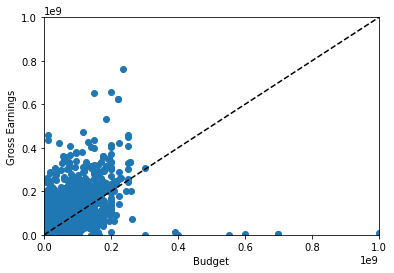

In [63]:
# plot Budget vs Gross Earnings
plt.scatter(movies['Budget'], movies['Gross Earnings'])
plt.plot([0,1E10],[0,1E10], 'k--') #makes a line # the points below it had a budget that was more than they earned
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.1E10])
plt.ylim([0,1E9])

In the above I have added the y=x line to visualize if the gross earnings were above the budget. 
Because many of the data points are on top of each other, it is difficult to assess visually the relationship between the two variables

Note that pandas allows us to get the correlation of the entire dataframe all at once. There are many other packages that will do this as well, including numpy.

In [64]:
movies.corr()
# Budget and Gross earnings are not very correlated, r = 0.10

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.030886,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,0.061504,0.007397,-0.003147,0.275707,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.250298,0.173296,0.088449,0.131673,0.123558,0.123074,0.196605,0.013469,0.314765,0.328403,0.258486,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,0.069346,0.001642,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,0.013713,-0.014761,-0.024719,-0.049786,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.102179,0.021090,0.022639,0.044236,0.047451,0.036557,0.062039,-0.019559,0.079621,0.084292,0.119994,0.030688
Gross Earnings,0.030886,0.250298,0.069346,0.102179,1.000000,0.144945,0.154468,0.262768,0.308026,0.247400,0.378082,-0.027755,0.637271,0.559958,0.480601,0.198021
Facebook Likes - Director,-0.063820,0.173296,0.001642,0.021090,0.144945,1.000000,0.090707,0.119587,0.120199,0.119532,0.162036,-0.041297,0.297045,0.221890,0.180674,0.170834
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,0.154468,0.090707,1.000000,0.390466,0.249927,0.951660,0.135320,0.072204,0.192763,0.145461,0.190016,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.262768,0.119587,0.390466,1.000000,0.559662,0.628389,0.243464,0.071177,0.270755,0.219496,0.282306,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.308026,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.099368,0.287239,0.230189,0.271646,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.247400,0.119532,0.951660,0.628389,0.473920,1.000000,0.209754,0.091410,0.265865,0.206923,0.263203,0.085854


Correlation of Budget to gross earnings = 0.102179

This is not a strong correlation

### E1. What does it mean that year and duration are negatively correlated? Plot these two variables togther and explain.

Text(0,0.5,'Duration')

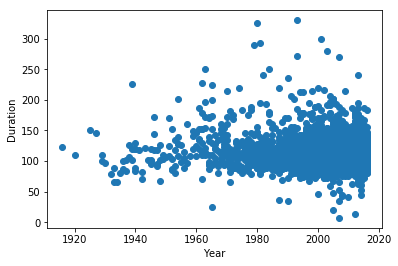

In [65]:
# plot Year vs Duration
plt.scatter(movies['Year'], movies['Duration'])
plt.plot()
plt.xlabel('Year')
plt.ylabel('Duration')

The correlation between year and duration is: -0.135038

This is a weak correlation, and plotting these variables shows that. The plot shows a cluster of movies between 50min and 200min across all years.

### E2. Which pairs of variables have the highest correlation? What might explain this?

The two variables that have the highest correlation are 'Facebook Likes - Actor 1' and 'Facebook Likes - cast Total'. Those two variables have a correlation of: 0.951660. Maybe the whole cast gets a lot of likes because actor 1 is apart of it. Therefore, the people who like that actor a lot will like the actors page and any movies they've been in.

## 9.1.2 Linear regression

See https://en.wikipedia.org/wiki/Linear_regression and http://onlinestatbook.com/2/regression/regression.html for a nice introduction. See https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2 for a good intro on the math

Supposed we were convinced that gross earnings were linearly related to budget, i.e. G = a*B +c. To test this, we would fit the scatterplot we made above to a line, which would solve for the coefficients a (slope) and c (intercept) in our linear equation.

The basic idea of linear regression is that one finds the distance of each data point to a line and minimize this (using calculus) to find the best fit line. This is commonly called ordinary least squares, as the distance of the data from the linear model is squared.

Because the movies database has a number of nans in it, it's a bit difficult to work with. Instead, let's do the tutorial here on linear regression using Boston housing data: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

This tutorial uses the package scikit-learn

In [66]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

What we want to do here is to determine which variables contribute to housing prices

In [67]:
data?

In [68]:
# information on the data:
print(data.DESCR)

#DESCR = description

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [69]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [70]:
# convert the data set into a pandas data frame  
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame ---The thing we are trying to predict
target = pd.DataFrame(data.target, columns=["MEDV"])


Why can't you just do a correlation between the two varables in the df dataframe instead of having to extract MEDV into a new data frame and then into a model?


In [71]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [72]:
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [73]:
# are room numbers and value correlated?
import numpy as np
np.corrcoef(df["RM"], target["MEDV"])

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

Text(0,0.5,'House value ($1000s)')

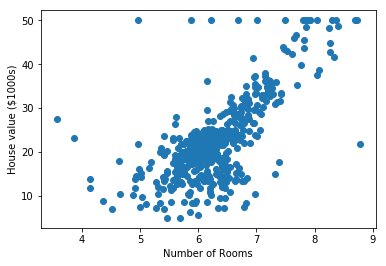

In [74]:
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

### Doing a linear regression using scipy

In [75]:
from scipy import stats

In [76]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RM"],target["MEDV"])

What is the r_value and the p_value?

In [77]:
stats.linregress(df["RM"],target["MEDV"])

LinregressResult(slope=9.102108981180306, intercept=-34.67062077643854, rvalue=0.695359947071539, pvalue=2.487228871008377e-74, stderr=0.41902656012134054)

this gives us the slope and intercept of the line, the corrlation (r_value)

A low p-value (< 0.05) indicates that the linear regression is a good model

**the standard error is the standard deviation of the data from the model (instead of the mean)**

In [78]:
slope

9.102108981180306

In [79]:
intercept

-34.67062077643854

In [80]:
r_value
# note this is the same correlation value we got before

0.695359947071539

In [81]:
p_value

2.487228871008377e-74

In [82]:
std_err

0.41902656012134054

Text(0,0.5,'House value ($1000s)')

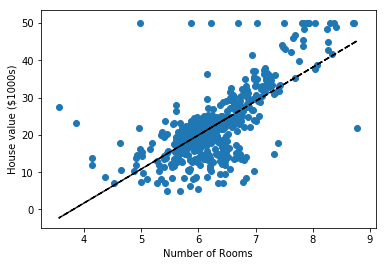

In [83]:
plt.plot(df["RM"], slope*df["RM"]+intercept, 'k--') 
#m=slope
#x=df["RM"]
#b=Intercept
#color and style of line:'k--'
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

### Doing a linear regression using statsmodels

See https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

and

https://www.statsmodels.org/dev/index.html

In [84]:
import statsmodels.api as sm

In [85]:
X = df["RM"] # what we think the cost depends on
y = target["MEDV"]

In [106]:
# Note y, the target, goes first:
model = sm.OLS(y, X).fit()
#Old Least Squares?
# this is fitting y = aX, with no constant, or rather an intercept of zero
#Define model befor eyou use it
#Target goes first here - the y data

#Punish points that are far from the line
#Is OLS the same as r squared?

In [87]:
model

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          3.74e-256
Time:                        20:47:51   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
predictions = model.predict(X) # make the predictions by the model

KeyError: 'MEDV'

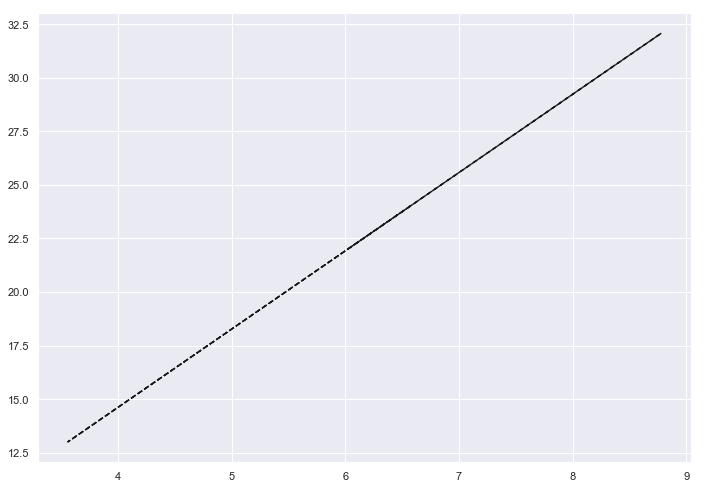

In [133]:
plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')
# this is not a very good fit

Note that with statsmodels you can easily do generalized linear regression, i.e. regression with more than one variable: 

y = a*X_1 + b*X_2 + ...

### E3. do the tutorial: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [91]:
import seaborn as sns 

In [92]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [93]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [94]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


- data: contains the information for various houses
- target: prices of the house
- feature_names: names of the features
- DESCR: describes the dataset

In [95]:
boston_dataset.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [96]:
#print the first 5 rows of the data using head()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [97]:
boston['MEDV'] = boston_dataset.target

In [98]:
#count the number of missing values for each feature using isnull()

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\Bridgett\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


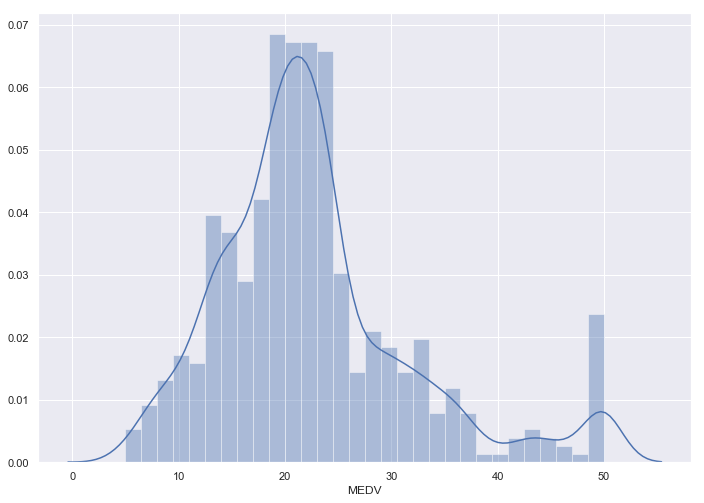

In [99]:
#This is a plot of the distribution of the target variable MEDV

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

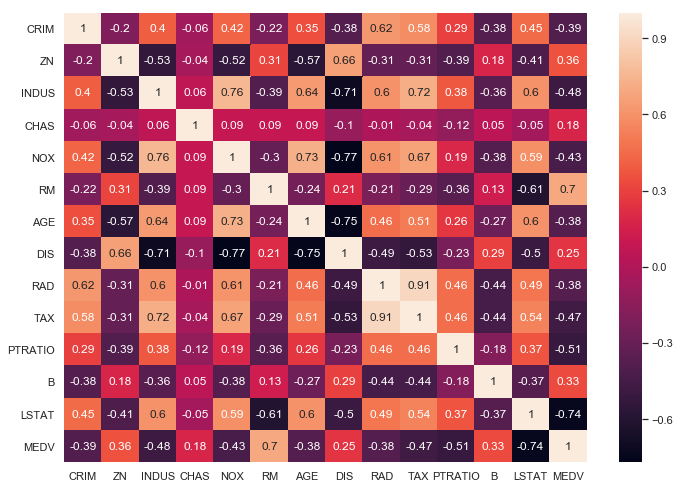

In [100]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Note: The beige diagonal line of ones occurs where the variables are correlated to themselves.

RM has a strong positive correlation with MEDV (0.7)

LSTAT has a high negative correlation with MEDV(-0.74)


Text(0,0.5,'MEDV')

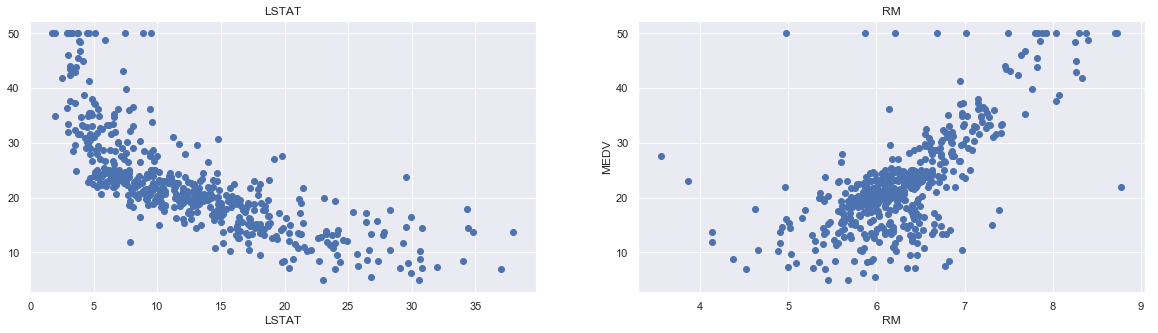

In [101]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
plt.ylabel('MEDV')

In [102]:
for i, col in enumerate(features):
    print (i)
    print(col)

0
LSTAT
1
RM


In [103]:
enumerate?

In [104]:
len(features)

2

In [105]:
#what is LSTAT?

LSTAT

NameError: name 'LSTAT' is not defined

In [ ]:
boston_dataset.DESCR

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000

- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
#Y = boston['MEDV']

In [ ]:
Y = boston['MEDV']

In [ ]:
boston['MEDV'] = boston_dataset.target

In [ ]:
boston

In [ ]:
boston.isnull().sum()

In [ ]:
import pandas as pd
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [107]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [108]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404,)
(102,)
(404,)
(102,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

In [ ]:
y_train_predict = lin_model.predict(X_train)

In [ ]:
predict?

In [ ]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
#r2 = r2_score(Y_train, y_train_predict)

In [124]:
rmse

5.137400784702911

In [ ]:
y_train_predict

In [ ]:
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

In [ ]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

### E4. Following the methods in the tutorial above, do the regression with just the rooms and not the other variable. How does this compare with the scipy result?

This may be helpful is figuring out how to write out the slope and intercept:

https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

In [121]:
X = pd.DataFrame(np.c_[boston['RM']], columns = ['RM'])
Y = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y1=boston['MEDV']
print(Y1)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [120]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
5,5.21,6.430
6,12.43,6.012
7,19.15,6.172
8,29.93,5.631
9,17.10,6.004


In [115]:
X

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
5,6.430
6,6.012
7,6.172
8,5.631
9,6.004


In [117]:
Y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
#By defining test_size=.2,  train_size automatically turns into 0.8

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#import functions from sklearn package as we need them

lin_model = LinearRegression() #Creates linreg model
lin_model.fit(X_train, Y_train) #puts our variables into the linregmodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [127]:
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
#.predict to make the lin reg line 
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.4340897790637215




In [137]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#R2= Correlation Coefficient

The model performance for testing set
--------------------------------------
RMSE is 4.895963186952216
R2 score is 0.6938399401553497


In [130]:
Y_test
#These are our data points 

,MEDV
226,37.6
292,27.9
90,22.6
373,13.8
273,35.2
417,10.4
503,23.9
234,29.0
111,22.8
472,23.2


In [132]:
y_test_predict
#this is lin reg stuff
#Is it the line or the slope or the intercept or what?

array([[38.10145909],
       [25.66038564],
       [23.78098944],
       [10.44874691],
       [35.02207282],
       [13.96048253],
       [28.71330154],
       [26.50743745],
       [26.41037943],
       [23.95745857],
       [32.59562233],
       [19.9692563 ],
       [19.85455137],
       [31.00740019],
       [24.84862766],
       [19.2016156 ],
       [ 7.99582605],
       [14.84282817],
       [14.71929978],
       [17.95750826],
       [12.09873325],
       [23.38393391],
       [40.09556022],
       [23.47216847],
       [29.70152865],
       [18.81338352],
       [23.41922773],
       [21.65453646],
       [22.88982035],
       [25.21038937],
       [18.83103043],
       [14.93106273],
       [19.10455758],
       [32.39268283],
       [24.46921904],
       [22.97805492],
       [25.6692091 ],
       [19.18396869],
       [41.26025646],
       [29.13682744],
       [21.80453522],
       [11.44579748],
       [25.55450417],
       [19.8898452 ],
       [24.94568568],
       [27

In [134]:
r_value
# note this is the same correlation value we got before

0.695359947071539

In [135]:
r2

0.6938399401553497

The Correlation Coefficient is the same for the scipy rvalue and the test r2 value done with sklearn. The train r value was different: 0.4340897790637215

In [138]:
lin_model = LinearRegression() #Creates linreg model
lin_model.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
y_predict = lin_model.predict(X)
rmse = (np.sqrt(mean_squared_error(Y, y_predict)))
r2 = r2_score(Y, y_predict)

print("The model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

#This came out the same was the test r value. I wonder if this is representative of the data as a whole or only .8

The model performance
--------------------------------------
RMSE is 6.603071389222561
R2 score is 0.48352545599133423


In [ ]:
y_predict = lin_model.predict(X)
rmse = (np.sqrt(mean_squared_error(Y, y_predict)))
r2 = r2_score(Y, y_predict)

In [ ]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)